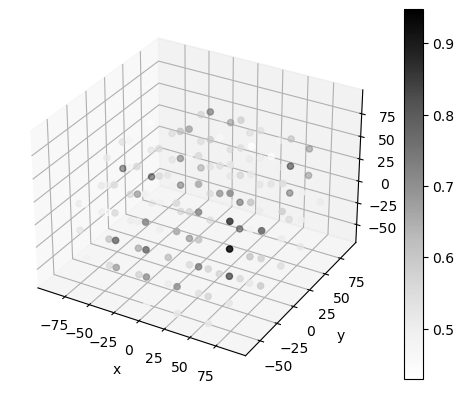

In [6]:
import shared_data as sd
from glob import glob
import utility_functions as uf
import matplotlib.pyplot as plt
import numpy as np


RESULTS = sd.RESULTS
selection_type = "grid"

if selection_type == "sphere" or selection_type == "eights":
    x = sd.R[1:]
    accuracy_mean_list = []
    accuracy_sd_list = []

if selection_type == "sphere":
    for j, _ in enumerate(x):
        result_path = glob(f"{RESULTS}/*layer{j+1}*validation*")[0]
        accuracy_mean, accuracy_sem = uf.get_accuracy_mean_and_sem(result_path)
        accuracy_mean_list.append(accuracy_mean)
        accuracy_sd_list.append(accuracy_sem * np.sqrt(sd.N_CROSS_VALIDATION_COMBINATIONS))
    plt.figure(figsize=(12, 6))
    plt.plot([x[0]-5, x[-1]+5], [0.5, 0.5], color="red", linestyle="--")
    plt.errorbar(x, accuracy_mean_list, yerr=accuracy_sd_list, capsize=3, marker="o")
    plt.ylim((0, 1))
    plt.xlim((x[0]-1, x[-1]+1))
    plt.ylabel("Cross-validation accuracy")
    plt.xlabel("Outer radius of shell ($\AA$)")
    plt.grid()
    plt.legend()
elif selection_type == "eights":
    for i in range(sd.N_SEGMENTS):
        for j, _ in enumerate(x):
            result_path = glob(f"{RESULTS}/*layer{j+1}_e{i+1}*validation*")[0]
            accuracy_mean, accuracy_sem = uf.get_accuracy_mean_and_sem(result_path)
            accuracy_mean_list.append(accuracy_mean)
            accuracy_sd_list.append(accuracy_sem * np.sqrt(sd.N_CROSS_VALIDATION_COMBINATIONS))
        plt.figure(figsize=(12, 6))
        plt.plot([x[0]-5, x[-1]+5], [0.5, 0.5], color="red", linestyle="--")
        plt.errorbar(x, accuracy_mean_list, yerr=accuracy_sd_list, capsize=3, marker="o", label=f"e{i+1}")
        plt.ylim((0, 1))
        plt.xlim((x[0]-1, x[-1]+1))
        plt.ylabel("Cross-validation accuracy")
        plt.xlabel("Outer radius of shell ($\AA$)")
        plt.grid()
        plt.legend()
elif selection_type == "grid":
    x = []
    y = []
    z = []
    c = []
    for i, grid_point in enumerate(sd.GRID_POINTS):
        result_paths = glob(f"{RESULTS}/*grid_{grid_point[0]}:{grid_point[1]}:{grid_point[2]}*validation*")
        if len(result_paths) == 0:
            continue
        else:
            x.append(grid_point[0])
            y.append(grid_point[1])
            z.append(grid_point[2])
            result_path = result_paths[0]
            accuracy_mean, _ = uf.get_accuracy_mean_and_sem(result_path)
        c.append(accuracy_mean)    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    img = ax.scatter(x, y, z, c=c, cmap="Greys")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    fig.colorbar(img)